## Air Quality Index Prediction

In [1]:
# Importing Necessary Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, f1_score,root_mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [2]:
aqi_data = pd.read_csv("city_day (2).csv")
aqi_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df = aqi_data.copy()
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
day = []
for d in df['Date']:
    day.append(datetime.strptime(d,'%Y-%m-%d').date().isoweekday())

In [5]:
df['day'] = np.array(day)

In [6]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,day
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,4
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,5
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,6
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,7
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1


In [7]:
df.shape

(29531, 17)

In [8]:
df.drop('Date',axis = 1,inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  Xylene      11422 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
 15  day         29531 non-null  int32  
dtypes: float64(13), int32(1), object(2)
memory usage: 3.5+ MB


In [10]:
df.drop('Xylene',axis = 1,inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  AQI         24850 non-null  float64
 13  AQI_Bucket  24850 non-null  object 
 14  day         29531 non-null  int32  
dtypes: float64(12), int32(1), object(2)
memory usage: 3.3+ MB


In [12]:
data_cols = ['AQI','PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene']

In [13]:
(df[['AQI','PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene']].isna().sum(axis =1)==12).sum()

1375

In [14]:
df.dropna(subset = data_cols,inplace = True,how = 'all')

In [15]:
df.shape

(28156, 15)

In [16]:
df.reset_index(inplace = True,drop = True)

In [17]:
df.tail()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,day
28151,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good,6
28152,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory,7
28153,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory,1
28154,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory,2
28155,Visakhapatnam,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,50.0,Good,3


In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.shape

(27325, 15)

In [20]:
cities = df['City'].unique()
cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [21]:
df.isna().sum()

City             0
PM2.5         2392
PM10          8934
NO            1376
NO2           1379
NOx           2166
NH3           8123
CO             549
SO2           1648
O3            1816
Benzene       4085
Toluene       6502
AQI           2475
AQI_Bucket    2475
day              0
dtype: int64

In [22]:
df.drop(['City','AQI_Bucket'],axis = 1).corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,day
PM2.5,1.000000,0.846498,0.433491,0.350709,0.436792,0.275086,0.089912,0.132325,0.161238,0.023911,0.117080,0.659181,-0.003727
PM10,0.846498,1.000000,0.502349,0.464380,0.527768,0.376816,0.112588,0.256974,0.244919,0.022265,0.169335,0.803313,-0.010479
NO,0.433491,0.502349,1.000000,0.478070,0.794890,0.185621,0.212607,0.170322,0.014580,0.035771,0.150857,0.452191,-0.008272
NO2,0.350709,0.464380,0.478070,1.000000,0.627627,0.234938,0.356521,0.392233,0.293349,0.025260,0.273926,0.537071,-0.013142
NOx,0.436792,0.527768,0.794890,0.627627,1.000000,0.166179,0.225470,0.238397,0.093170,0.037439,0.186210,0.486450,-0.011583
NH3,0.275086,0.376816,0.185621,0.234938,0.166179,1.000000,0.104862,-0.038998,0.094972,-0.015664,0.013200,0.252019,-0.004458
CO,0.089912,0.112588,0.212607,0.356521,0.225470,0.104862,1.000000,0.489697,0.041736,0.060405,0.275300,0.683346,-0.002137
SO2,0.132325,0.256974,0.170322,0.392233,0.238397,-0.038998,0.489697,1.000000,0.162142,0.036110,0.296139,0.490586,-0.000419
O3,0.161238,0.244919,0.014580,0.293349,0.093170,0.094972,0.041736,0.162142,1.000000,0.020255,0.130209,0.198991,0.003517
Benzene,0.023911,0.022265,0.035771,0.025260,0.037439,-0.015664,0.060405,0.036110,0.020255,1.000000,0.739151,0.044407,0.001298


* Since, PM2.5 and PM10 are strongly corelated (>0.8), we can remove one of them.
* As PM10 has high number of nan values, it is better to drop this column rather PM2.5
* Similarly, among Benzene and Toluene (corr ~ 0.74), we can remove Toluene as it has high number of nan values.
* And same for NOx and NO, we can remove NOx

In [23]:
 df.drop(['PM10','Toluene'], axis =1,inplace = True)

In [24]:
df.drop('NOx',axis = 1, inplace = True)

In [25]:
df.isna().sum()

City             0
PM2.5         2392
NO            1376
NO2           1379
NH3           8123
CO             549
SO2           1648
O3            1816
Benzene       4085
AQI           2475
AQI_Bucket    2475
day              0
dtype: int64

In [26]:
data_cols = df.columns[1:10]

In [27]:
Grouped_data = df.groupby(by = ['City','day'])
medians = {}
for city in cities:
    medians[city] = {}
    for column in data_cols:
            medians[city][column] = Grouped_data[column].median()[city]

In [28]:
medians['Hyderabad']

{'PM2.5': day
 1    41.860
 2    42.650
 3    44.865
 4    43.240
 5    39.800
 6    40.035
 7    41.030
 Name: PM2.5, dtype: float64,
 'NO': day
 1    6.780
 2    6.980
 3    6.880
 4    7.165
 5    7.510
 6    6.960
 7    6.530
 Name: NO, dtype: float64,
 'NO2': day
 1    25.390
 2    26.400
 3    26.240
 4    26.285
 5    24.680
 6    25.680
 7    25.110
 Name: NO2, dtype: float64,
 'NH3': day
 1    14.370
 2    14.255
 3    14.020
 4    14.400
 5    14.340
 6    14.450
 7    14.620
 Name: NH3, dtype: float64,
 'CO': day
 1    0.570
 2    0.570
 3    0.575
 4    0.580
 5    0.540
 6    0.570
 7    0.550
 Name: CO, dtype: float64,
 'SO2': day
 1    7.340
 2    7.070
 3    7.020
 4    7.005
 5    7.115
 6    7.125
 7    6.610
 Name: SO2, dtype: float64,
 'O3': day
 1    32.530
 2    31.400
 3    31.080
 4    32.030
 5    31.550
 6    33.025
 7    33.060
 Name: O3, dtype: float64,
 'Benzene': day
 1    0.790
 2    0.760
 3    0.780
 4    0.740
 5    0.790
 6    0.690
 7    0.775
 Name:

In [29]:
cnt = 0
for column in data_cols:
    updated_vals = []
    for index,row in df.iterrows():
        if np.isnan(row[column]):
            city = row['City']
            day = row['day']
            updated_vals.append(medians[city][column][day])
        else:
            updated_vals.append(row[column])
    updated_vals = np.array(updated_vals)
    df[column+'_updated'] = updated_vals
    df.drop(column,axis = 1,inplace = True)

In [30]:
df.rename(columns = {'PM2.5_updated':'PM2.5','PM10_updated':'PM10','NO_updated':'NO',
          'NO2_updated':'NO2','NOx_updated':'NOx','NH3_updated':'NH3',
          'CO_updated':'CO','SO2_updated':'SO2','O3_updated':'O3',
          'Benzene_updated':'Benzene','Toluene_updated':'Toluene'},inplace = True)

In [31]:
df.isna().sum()

City              0
AQI_Bucket     2475
day               0
PM2.5             0
NO                0
NO2               0
NH3            1424
CO                0
SO2               0
O3              159
Benzene        2475
AQI_updated       0
dtype: int64

* All nan values of NH3 are belongs to Ahmedabad city, so we can replace them with the known mean value of known data from web which is 5

In [32]:
df['Benzene'].fillna(0,inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15320\3435018655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Benzene'].fillna(0,inplace = True)


In [33]:
df['NH3'].fillna(5,inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15320\2480851416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NH3'].fillna(5,inplace = True)


In [34]:
df

,City,AQI_Bucket,day,PM2.5,NO,NO2,NH3,CO,SO2,O3,Benzene,AQI_updated
0,Ahmedabad,NaN,4,55.565,0.92,18.22,5.00,0.92,27.64,133.36,0.00,413.0
1,Ahmedabad,NaN,5,58.360,0.97,15.69,5.00,0.97,24.55,34.06,3.68,360.0
2,Ahmedabad,NaN,6,60.115,17.40,19.30,5.00,17.40,29.07,30.70,6.80,362.0
3,Ahmedabad,NaN,7,57.235,1.70,18.48,5.00,1.70,18.59,36.08,4.43,379.0
4,Ahmedabad,NaN,1,57.740,22.10,21.42,5.00,22.10,39.33,39.31,7.01,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28151,Visakhapatnam,Good,6,15.020,7.68,25.06,12.47,0.47,8.55,23.30,2.24,41.0
28152,Visakhapatnam,Satisfactory,7,24.380,3.42,26.06,11.99,0.52,12.72,30.14,0.74,70.0
28153,Visakhapatnam,Satisfactory,1,22.910,3.45,29.53,10.71,0.48,8.42,30.96,0.01,68.0
28154,Visakhapatnam,Satisfactory,2,16.640,4.05,29.26,10.03,0.52,9.84,28.30,0.00,54.0


In [35]:
df_aqi = df[['AQI_updated','AQI_Bucket']]

In [36]:
df.drop(['AQI_updated','AQI_Bucket'],axis = 1,inplace = True)

In [37]:
df.isna().sum()

City         0
day          0
PM2.5        0
NO           0
NO2          0
NH3          0
CO           0
SO2          0
O3         159
Benzene      0
dtype: int64

In [38]:
df[df['O3'].isna()]

,City,day,PM2.5,NO,NO2,NH3,CO,SO2,O3,Benzene
11532,Ernakulam,3,37.48,127.81,7.76,101.97,1.94,3.34,NaN,0.64
11533,Ernakulam,5,41.13,125.76,7.95,102.66,1.12,3.46,NaN,0.68
11534,Ernakulam,6,53.00,126.22,7.80,104.05,1.17,3.48,NaN,0.90
11535,Ernakulam,7,58.31,125.14,7.95,103.20,1.20,3.54,NaN,1.15
11536,Ernakulam,1,53.06,152.12,5.90,133.25,1.24,3.49,NaN,1.34
...,...,...,...,...,...,...,...,...,...,...
11686,Ernakulam,6,12.14,5.19,2.16,4.78,2.43,2.69,NaN,0.38
11687,Ernakulam,7,8.97,7.27,2.00,7.32,2.16,2.66,NaN,0.27
11688,Ernakulam,1,12.22,5.44,2.17,5.06,2.41,2.74,NaN,0.18
11689,Ernakulam,2,11.87,3.80,2.35,2.99,2.42,2.65,NaN,0.00


* Only Ernakulam has all O3 as nan values
* Ernakulam has 6ppm on average

In [39]:
df['O3'].fillna(6,inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15320\1656726291.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['O3'].fillna(6,inplace = True)


In [40]:
df_aqi.rename(columns = {'AQI_updated':'AQI'},inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15320\633503665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aqi.rename(columns = {'AQI_updated':'AQI'},inplace = True)


In [41]:
df_aqi.reset_index(inplace = True,drop = True)

In [42]:
df_aqi.tail()

,AQI,AQI_Bucket
27320,41.0,Good
27321,70.0,Satisfactory
27322,68.0,Satisfactory
27323,54.0,Satisfactory
27324,50.0,Good


<Axes: xlabel='AQI', ylabel='AQI'>

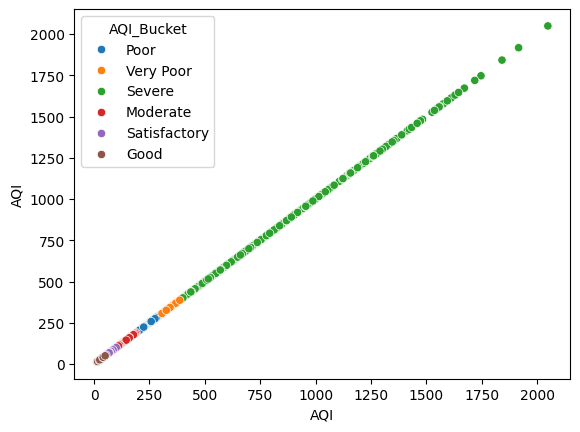

In [43]:
sns.scatterplot(data = df_aqi,x = 'AQI',y = 'AQI',hue = 'AQI_Bucket')

* Clearly, we can see that there is a **direct** relation between 'AQI' and 'AQI_Bucket'
* So, we can just **ignore** in predicting the value of AQI and based on the value of AQI we can define what AQI_Bucket is.

In [44]:
levels = df_aqi['AQI_Bucket'].unique()
print(levels)

[nan 'Poor' 'Very Poor' 'Severe' 'Moderate' 'Satisfactory' 'Good']


In [45]:
for level in levels[1:]:
    m = df_aqi[df_aqi['AQI_Bucket'] == level]['AQI'].min()
    print('For level',level,': minimum AQI is ',m)

For level Poor : minimum AQI is  201.0
For level Very Poor : minimum AQI is  301.0
For level Severe : minimum AQI is  401.0
For level Moderate : minimum AQI is  101.0
For level Satisfactory : minimum AQI is  51.0
For level Good : minimum AQI is  13.0


* So we have used place and the day to fill the nan values accordingly but technically there is **no participation** of city of time to calculate the value of AQI
* So we can drop them now.
* Also, we change the names of features to our convinience.

In [46]:
df.drop(['City','day'],axis = 1,inplace = True)

In [47]:
df.reset_index(inplace = True,drop = True)

In [48]:
df.tail()

,PM2.5,NO,NO2,NH3,CO,SO2,O3,Benzene
27320,15.02,7.68,25.06,12.47,0.47,8.55,23.30,2.24
27321,24.38,3.42,26.06,11.99,0.52,12.72,30.14,0.74
27322,22.91,3.45,29.53,10.71,0.48,8.42,30.96,0.01
27323,16.64,4.05,29.26,10.03,0.52,9.84,28.30,0.00
27324,15.00,0.40,26.85,5.20,0.59,2.10,17.05,4.60


In [49]:
df.shape

(27325, 8)

## Modelling

* So, here is our prepared data for modelling.
* Now, we move forward by testing with basic models like Linear Regression and its other types (Ridge, Lasso)
* Then we will train with models like Decsion Tree and Random forest.
* Finally, we will train the model by building Neural Networks.

In [50]:
df['AQI'] = df_aqi['AQI']

In [51]:
means = []
stds = []
cols = df.columns
for col in cols:
    mn = df[col].mean()
    std = df[col].std()
    means.append(mn)
    stds.append(std)
    df[col] = (df[col]-mn)/std

In [108]:
means

[65.65173522415371,
 17.675484903934127,
 28.12181738334859,
 21.913047575480327,
 2.2864437328453797,
 14.490973101555351,
 33.997017383348584,
 2.9341549862763032,
 163.23103385178408]

In [52]:
X = df.drop('AQI',axis = 1)
y = df_aqi['AQI']

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [54]:
X_train.head()

,PM2.5,NO,NO2,NH3,CO,SO2,O3,Benzene
24487,0.086844,0.681231,-0.835006,-0.640936,0.096383,-0.444212,-1.227095,-0.197963
17066,0.062642,-0.464890,-0.866269,-0.680123,-0.285683,0.432800,0.231900,-0.197963
15789,0.639650,0.033424,-0.241009,0.899835,-0.212704,-0.303506,-0.425144,-0.195264
8413,-0.366108,-0.370165,-0.540717,3.830417,-0.171206,-0.324414,-0.685223,-0.187168
26439,-0.022948,-0.717638,0.009928,-0.447672,-0.181223,-0.262819,3.056431,0.001744


In [55]:
Y_train.head()

24487    437.0
17066     92.0
15789    275.0
8413      72.0
26439    125.0
Name: AQI, dtype: float64

### Linear Regression

In [56]:
linear = LinearRegression()

In [57]:
linear.fit(X_train,Y_train)

LinearRegression()

In [58]:
linear.score(X_train,Y_train)

0.7995313350943454

In [59]:
Y_pred = linear.predict(X_test)

In [60]:
r2_score(Y_test,Y_pred)

0.7772060204769106

In [61]:
root_mean_squared_error(Y_test,Y_pred)

64.23036516706252

### Ridge

In [62]:
ridge = Ridge()

In [63]:
ridge.fit(X_train,Y_train)

Ridge()

In [64]:
ridge.score(X_train,Y_train)

0.7995313337264888

In [65]:
Y_pred = ridge.predict(X_test)

In [66]:
r2_score(Y_test,Y_pred)

0.7772055735546127

In [67]:
root_mean_squared_error(Y_test,Y_pred)

64.23042958973689

### Lasso

In [68]:
lasso = Lasso()

In [69]:
lasso.fit(X_train,Y_train)

Lasso()

In [70]:
lasso.score(X_train,Y_train)

0.7993020515188447

In [71]:
Y_pred = lasso.predict(X_test)

In [72]:
r2_score(Y_test,Y_pred)

0.777294128373497

In [73]:
root_mean_squared_error(Y_test,Y_pred)

64.21766338310266

## Decision Tree

In [74]:
dtr = DecisionTreeRegressor()

In [75]:
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [76]:
dtr.score(X_train,Y_train)

0.9999306955862988

In [77]:
Y_pred = dtr.predict(X_test)

In [78]:
r2_score(Y_test,Y_pred)

0.7494603342440955

In [79]:
root_mean_squared_error(Y_test,Y_pred)

68.11251436553403

## RandomForest Regression

In [80]:
import joblib

In [81]:
rfr = RandomForestRegressor()

In [82]:
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [83]:
rfr.score(X_train,Y_train)

0.9825556772236514

In [84]:
Y_pred = rfr.predict(X_test)

In [85]:
r2_score(Y_test,Y_pred)

0.8642418476873615

In [86]:
root_mean_squared_error(Y_test,Y_pred)

50.138533244316235

In [87]:
# Since random forest is giving better efficiency we are saving this model.

In [110]:
joblib.dump(rfr,"my_random_forest.joblib")
loaded_rf = joblib.load("my_random_forest.joblib")

### Implementing Neural Networks

In [89]:
model = Sequential()

In [90]:
model.add(Dense(1000,input_shape = (X_train.shape[1],),activation = 'relu'))
model.add(Dense(500,activation = 'relu'))
model.add(Dense(1,activation = 'relu'))
model.summary()

C:\Users\hp\OneDrive\Documents\MLKernal\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1000)                │           9,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 510,001 (1.95 MB)

 Trainable params: 510,001 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(optimizer = 'adam',loss = 'mse',metrics = ['mean_squared_error'])

In [92]:
es = EarlyStopping(monitor = 'val_loss',mode = 'min',patience = 50,restore_best_weights = True)

In [93]:
history = model.fit(X_train,Y_train,validation_data = (X_test,Y_test),callbacks = [es],epochs = 10,batch_size = 5,verbose = 1)

Epoch 1/10
4372/4372 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 6651.6353 - mean_squared_error: 6651.6353 - val_loss: 5290.3047 - val_mean_squared_error: 5290.3047
Epoch 2/10
4372/4372 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 4202.2876 - mean_squared_error: 4202.2876 - val_loss: 4000.3352 - val_mean_squared_error: 4000.3352
Epoch 3/10
4372/4372 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 3321.6680 - mean_squared_error: 3321.6680 - val_loss: 3295.4612 - val_mean_squared_error: 3295.4612
Epoch 4/10
4372/4372 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 3020.7041 - mean_squared_error: 3020.7041 - val_loss: 3555.7512 - val_mean_squared_error: 3555.7512
Epoch 5/10
4372/4372 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 3156.5842 - mean_squared_error: 3156.5842 - val_loss: 3111.1221 - val_mean_squared_error: 3111.1221
Epoch 6/10
4372/4372 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 2738.0439 - mean_squared_error: 2738.0439 - val_loss: 3156.4048 - val_mean_squared_error: 3156.4048
Epoch 7/10
4372/4372 ━

In [94]:
model.evaluate(X_test,Y_test)

171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2665.9189 - mean_squared_error: 2665.9189


[3007.935302734375, 3007.935302734375]

**Plotting Loss**

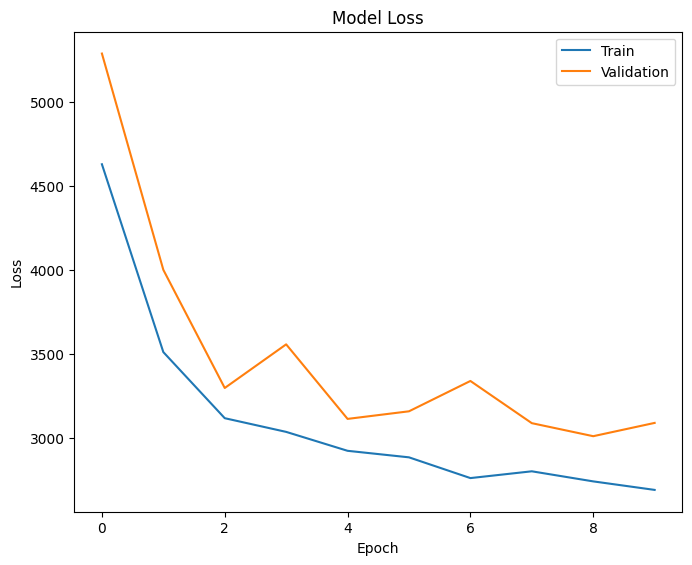

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.subplots_adjust(top = 1.0,bottom = 0.0,right = 0.95,left = 0,hspace = 0.25,wspace = 0.35)

**Plotting Actual vs Predicted**

684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


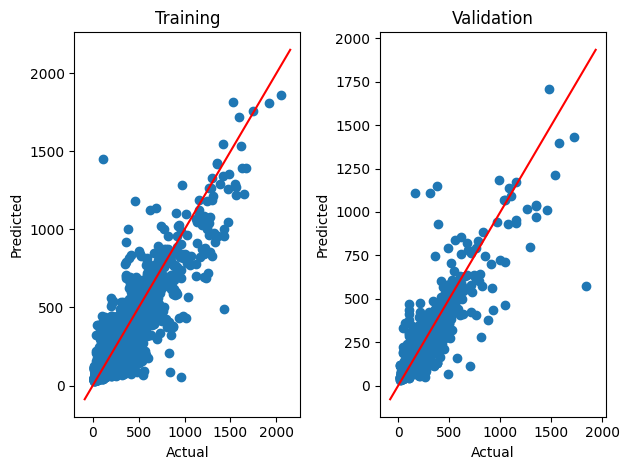

In [96]:
fig,axes = plt.subplots(1,2)
axes[0].scatter(x = Y_train,y = model.predict(X_train))
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Training')
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x,x,color = 'red')

axes[1].scatter(x = Y_test,y = model.predict(X_test))
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Validation')
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x,x,color = 'red')

fig.tight_layout()
plt.show()

In [97]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print('Train MAE',mean_absolute_error(Y_train,train_pred))
print('Test MAE',mean_absolute_error(Y_test,test_pred))

684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train MAE 26.37048854801705
Test MAE 27.001178447587275


In [98]:
r2_score(Y_test,test_pred)

0.8375606952893382